## Programming cheatsheet and exercises

The goal of these exercises is to teach you the use of _Python 3_ in the context of _Modelling and data analysis of chemical processes_. These programming lessons do not require prior programming experience. If you do have experience with programming in Python then you may find some exercises rather easy, so consider them as a refresher.


## Introduction to This Template Notebook

**How to use?**:
* Run the code cell by putting the cursor there and pressing **Control-Enter**.

* The locations where you should write your solutions can be recognized by the following comment.

* Double-clicking markdown cells will reveal their content. Press **Control-Enter** to make the cells user-friendly again. 

>`# WRITE YOUR CODE HERE`

**Make sure to clear your variables using `%reset -f` when you are done with an exercise and run it from top to bottom**

<hr style="border:2px solid #eee">


## Learning Objectives

After this lesson, you should

1. Learn how to perform curve fitting using `numpy.polyfit`
1. Learn how to perform curve fitting using `scipy.optimize.curve_fit`
1. Learn how to perform numerical integration using `numpy.trapz`
1. Learn how to integrate ordinary differential equations using `scipy.integrate.odeint`
1. Learn how to load and visualize experimental data using `pandas`
1. Learn how to combine numerical integration and curve fitting to model a real system

## 1. Curve fitting using `numpy.polyfit`

As the name suggests `numpy.polyfit` is able to fit polynomials of arbitrary degrees with ease. The example below is self explanatory:

Original Coefficients: a=0.4000, b=0.4000, c=5.0000
Fitted Coefficients:   a=0.4062, b=0.3687, c=5.0231


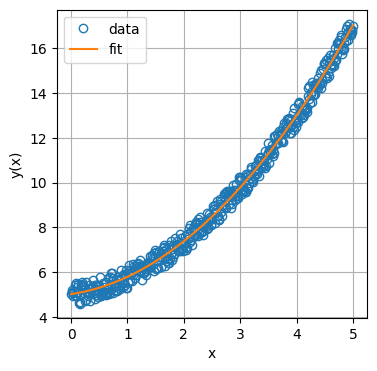

In [1]:
#! IGNORE EXPECTED OUTPUT
import numpy as np
import matplotlib.pyplot as plt

# Ensuring reproducibility
np.random.seed(0)

# Generating some fake data with a second-degree polynomial and noise
x = np.linspace(0, 5, 500)
a, b, c = 0.4, 0.4, 5
noise = (np.random.rand(len(x)) - 0.5)  # Noise around 0
y = a * x**2 + b * x + c + noise  # Second degree polynomial with noise

# Fitting the result with polyfit
a_fit, b_fit, c_fit = np.polyfit(x, y, deg=2)

# Print the results with 4 decimal places accuracy
print("Original Coefficients: a={:.4f}, b={:.4f}, c={:.4f}".format(a, b, c))
print("Fitted Coefficients:   a={:.4f}, b={:.4f}, c={:.4f}".format(a_fit, b_fit, c_fit))

# Visualizing the original line and the curve fit
plt.figure(figsize=(4,4))
plt.plot(x, y, "o", mfc="none", label="data")
plt.plot(x, np.polyval((a_fit, b_fit, c_fit),x), "-", label="fit")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.grid()
plt.show()

## Exercise 1

**Create data for a fourth order polynomial, fit it using `numpy.polyfit` and plot the results to compare the fit with the data.**

a) Start by importing the necessary libraries.

In [2]:
#! BEGIN ANSWER
import numpy as np
import matplotlib.pyplot as plt
#! END ANSWER

b) Generate the data for a polynomial of degree 2 and add some noise to it.

> Hint: You can make noise using `np.random.rand` and `x` values using `np.linspace`.

In [3]:
# Ensuring reproducibility
np.random.seed(0)

# Makign the data
#! BEGIN ANSWER
a, b, c, d = 10, 2, 3, 4 # Coefficients to be fitted
x = np.linspace(-3, 3, 200)
noise = np.random.rand(len(x))-0.5
y = a*x**3 + b*x**2 + c*x**1 + d*x**0 + noise
#! END ANSWER
#! BEGIN EXCLUDE
print("`x.shape` =",x.shape)
print("`y.shape` =",y.shape)
#! END EXCLUDE

`x.shape` = (200,)
`y.shape` = (200,)


c) Perform the fit to find the polynomial coefficients.

> Hint: `np.polyfit` returns the coefficients `p` in the order `p(x) = p[0] * x**deg + ... + p[deg]`.

In [4]:
# Performing the fit
#! BEGIN ANSWER
af, bf, cf, df = np.polyfit(x, y, deg = 3)
#! END ANSWER
#! BEGIN EXCLUDE
print("`afit` $\\approx$",a)
print("`bfit` $\\approx$",b)
print("`cfit` $\\approx$",c)
print("`dfit` $\\approx$",d)
#! END EXCLUDE

`afit` $\approx$ 10
`bfit` $\approx$ 2
`cfit` $\approx$ 3
`dfit` $\approx$ 4


d) Plot the results to check if the fit was successful.

> Tip: `np.polyval` is a very useful function for evaluating polynomials with arbitrary coefficients.

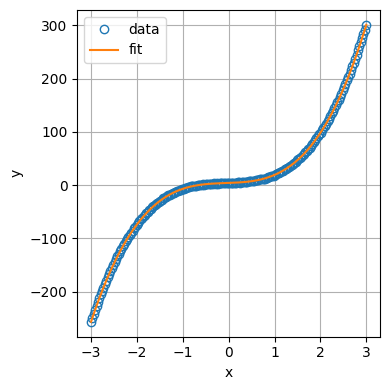

In [5]:
# Plotting the results for comparision
#! BEGIN ANSWER
#! BEGIN EXCLUDE
plt.figure(figsize=(4,4))
#! END EXCLUDE
plt.plot(x, y, "o", mfc="none", label="data")
plt.plot(x, np.polyval((af, bf, cf, df), x), "-", label="fit")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
#! BEGIN EXCLUDE
plt.tight_layout()
#! END EXCLUDE
plt.show() # Uncomment this when everyithing is working
#! END ANSWER

>Make sure to clear your variables before moving on to the next question by running the following code block

In [6]:
%reset -f

## 2. Curve fitting using `scipt.optimize.curve_fit`

`scipy.optimize.curve_fit` allows one to fit virtually any equation as long as it can be written in the form `f(x, param1, param2, ...)` wherein `param1`, `param2`, etc. are optimized. For example:

Original Coefficients: a=10.0000, b=2.0000, c=3.0000
Fitted Coefficients:   a=10.2722, b=2.0550, c=3.2906


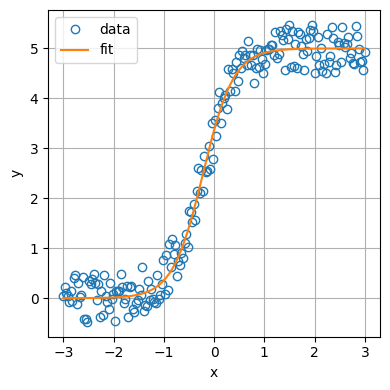

In [7]:
#! IGNORE EXPECTED OUTPUT
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Ensuring reproducibility
np.random.seed(0)

# Generating the function to be fitted
def f(x, a, b, c):
  return a/(b + np.exp(-c*x))

# Generating the data
a, b, c = 10, 2, 3 # Coefficients to be fitted
x = np.linspace(-3, 3, 200)
noise = np.random.rand(len(x))-0.5
y = f(x, a, b, c) + noise

# Fitting
initial_guess = [1, 1, 1]
fit_params, _ = curve_fit(f, x, y, p0 = initial_guess)

# Unpacking the fit constants
a_fit, b_fit, c_fit = fit_params

# Print the results with 4 decimal places accuracy
print("Original Coefficients: a={:.4f}, b={:.4f}, c={:.4f}".format(a, b, c))
print("Fitted Coefficients:   a={:.4f}, b={:.4f}, c={:.4f}".format(a_fit, b_fit, c_fit))

# Visualizing the fit
#! BEGIN EXCLUDE
plt.figure(figsize=(4,4))
#! END EXCLUDE
plt.plot(x, y, "o", mfc="none", label="data")
plt.plot(x, f(x, a_fit, b_fit, c_fit), "-", label="fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
#! BEGIN EXCLUDE
plt.tight_layout()
#! END EXCLUDE
plt.show()

## Exercise 2

**Repeat exercise 1a) using `scipy.optimize.curve_fit`.**

a) Start by importing the relevant libraries.

In [8]:
#! BEGIN ANSWER
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#! END ANSWER

b) Then generate the data for the same polynomial used in the previous question.

In [9]:
# Ensuring reproducibility
np.random.seed(0)

# Makign the data
#! BEGIN ANSWER
a, b, c = 10, 2, 3 # Coefficients to be fitted
x = np.linspace(-3, 3, 200)
noise = np.random.rand(len(x))-0.5
y = a*x**2 + b*x**1 + c*x**0 + noise
#! END ANSWER
#! BEGIN EXCLUDE
print("`x.shape` =",x.shape)
print("`y.shape` =",y.shape)
#! END EXCLUDE

`x.shape` = (200,)
`y.shape` = (200,)


c) Perform the fit.

In [10]:
# Performing the fit
#! BEGIN ANSWER
def poly3(x, a, b, c):
  return a*x**2 + b*x**1 + c*x**0

initial_guess = [1, 1, 1]

(af, bf, cf), _ = curve_fit(poly3, x, y, p0=initial_guess)
#! END ANSWER
#! BEGIN EXCLUDE
print("`afit` $\\approx$",a)
print("`bfit` $\\approx$",b)
print("`cfit` $\\approx$",c)
#! END EXCLUDE

`afit` $\approx$ 10
`bfit` $\approx$ 2
`cfit` $\approx$ 3


d) Plot the results to confirm if the fit was sucessful

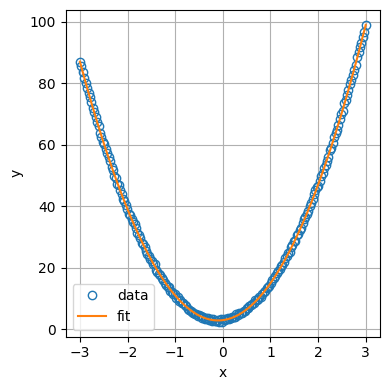

In [11]:
# Plotting the results for comparision
#! BEGIN ANSWER
#! BEGIN EXCLUDE
plt.figure(figsize=(4,4))
#! END EXCLUDE
plt.plot(x, y, "o", mfc = 'none', label = "data")
plt.plot(x, poly3(x, af, bf, cf), "-", label = "fit")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
#! BEGIN EXCLUDE
plt.tight_layout()
#! END EXCLUDE
plt.show() # Uncomment this when everyithing is working
#! END ANSWER

>Make sure to clear your variables before moving on to the next question by running the following code block

In [12]:
%reset -f

## 3. Integrating with `numpy.trapz`

Trapezoid integration is used to integrate a univariate function given `x` and `y` data. An example of this function being used can be seen below:

In [13]:
#! IGNORE EXPECTED OUTPUT
import numpy as np

# Generate some fake data for demonstration
x = np.linspace(0, np.pi, 100)
y = np.sin(x)

# Calculate the integral using numpy.trapz
integral = np.trapz(y, x)
real_integral = -np.cos(x.max()) + np.cos(x.min())

# Print the result
print("Integral using numpy.trapz:", integral)
print("Integral using algebra:    ", real_integral)
print("---------------------------")
print("Relative error:            ", "%.4e"%((integral-real_integral)/real_integral))

Integral using numpy.trapz: 1.9998321638939927
Integral using algebra:     2.0
---------------------------
Relative error:             -8.3918e-05


## Exercise 3

The error function $\mathrm{erf}$ is very important in chemical engineering because it appears in several analtycal solutions to differential equations dealing with flow.
$$\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}}\int_0 ^x{\exp(-t^2)dt}$$

**Integrate this equation numerically at $x=2$ using `trapz` and check if the result is close to the real answer, which you can compute using `math.erf`.**

a) Start by importing `numpy` and `math`.

In [14]:
#! BEGIN ANSWER
import math
import numpy as np
#! END ANSWER

b) Generate `100` points $t$ between [$0$,$x=2$] and evaluate $\exp\left(-t^2\right)$.

In [15]:
# Generating x data and y data
#! BEGIN ANSWER
x = 2
t = np.linspace(0, x, 100)
y = np.exp(-t**2)
#! END ANSWER
#! BEGIN EXCLUDE
print("`t.shape` =",t.shape)
print("`y.shape` =",y.shape)
#! END EXCLUDE

`t.shape` = (100,)
`y.shape` = (100,)


c) Integrate $\exp\left(-t^2\right)$ using `numpy.trapz` and multiply the result by $\frac{2}{\sqrt{\pi}}$ to obtain $erf(x)$.

> Hint: The function `numpy.trapz` takes `y` as the first instead of second argument.

In [16]:
# Performing the integration using np.trapz
#! BEGIN ANSWER
erfx = 2/np.sqrt(np.pi)*np.trapz(y, t)
#! END ANSWER
#! BEGIN EXCLUDE
print("`erfx` = ",erfx)
#! END EXCLUDE

`erfx` =  0.9953194536623462


d) Compare your answer with the one obtained from `math.erf`.

In [17]:
# Comparing the trapz answer to the real value
#! BEGIN ANSWER
print("erf(x):     ", erfx)
print("math.erf(x):", math.erf(x))
#! END ANSWER

erf(x):      0.9953194536623462
math.erf(x): 0.9953222650189527


>Make sure to clear your variables before moving on to the next question by running the following code block

In [18]:
%reset -f

## 4. Integrating ordinary differential equations using `scipy.integrate.odeint`

`odeint` is a function provided by the `scipy.integrate` module in Python, and it is used for solving ordinary differential equations (ODEs) numerically. It integrates a system of first-order ordinary differential equations in the following form:
$$\frac{\partial y}{\partial t} = f(y, t, \mathrm{args})$$
Since $y$ can be a vector, `odeint` can be used for complex models such as CSTR in series. Below you can find two examples of this function being used. One for a univariate function and another for a vector valued function representing a 5 CSTR in series model.

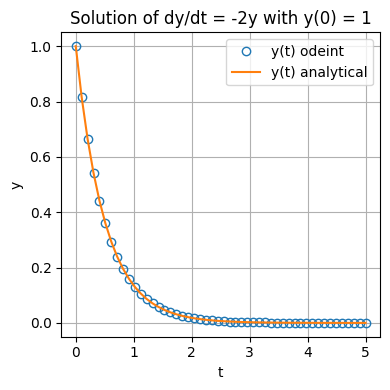

In [19]:
#! IGNORE EXPECTED OUTPUT
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE function
def model(y, t):
    dydt = -2 * y
    return dydt

# Initial condition
y0 = 1

# Define the t values where we want to solve the ODE
t = np.linspace(0, 5, 50)

# Solve the ODE using odeint
y = odeint(model, y0, t)

# Plot the results
#! BEGIN EXCLUDE
plt.figure(figsize=(4,4))
#! END EXCLUDE
plt.plot(t, y, "o", mfc='none', label='y(t) odeint')
plt.plot(t, np.exp(-2*t), label='y(t) analytical')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution of dy/dt = -2y with y(0) = 1')
plt.legend()
plt.grid()
#! BEGIN EXCLUDE
plt.tight_layout()
#! END EXCLUDE
plt.show()

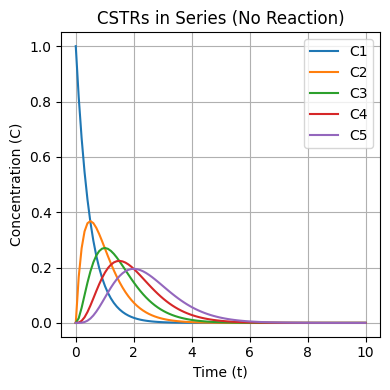

In [20]:
#! IGNORE EXPECTED OUTPUT
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the CSTR in series model
def model(C, t, params):
    F = params['F']
    V = params['V']
    Cin = params['Cin']
    tau = V/F

    dCdt = np.zeros(len(C))
    dCdt[0] = 1/tau*(Cin-C[0])
    dCdt[1:] = 1/tau*(C[0:-1] - C[1:])
    return dCdt

# Initial concentration in each CSTR (arbitrary values)
C0 = [1, 0, 0, 0, 0]

# Define the time values where we want to solve the ODE
t = np.linspace(0, 10, 100)

# Parameters dictionary for organization
params = {
    'F': 2.0,    # Volumetric flow rate
    'V': 1.0,    # Volume of each CSTR
    'Cin': 0.0   # Inlet concentration
}

# Solve the ODE using odeint
C = odeint(model, C0, t, args=(params,))

#! BEGIN EXCLUDE
plt.figure(figsize=(4,4))
#! END EXCLUDE
# Plot the results for each CSTR
for i in range(5):
    plt.plot(t, C[:, i], label='C{}'.format(i + 1))

plt.xlabel('Time (t)')
plt.ylabel('Concentration (C)')
plt.title('CSTRs in Series (No Reaction)')
plt.legend()
plt.grid(True)
#! BEGIN EXCLUDE
plt.tight_layout()
#! END EXCLUDE
plt.show()

## Exercise 4: Simulating a salt injection experiment in a CSTR

In this exercise we will simulate a salt injection experiment in a CSTR. For this we start by writing the rate function which must be integrated over time

$$\frac{\partial c}{\partial t} = \frac{1}{\tau}(c_{in} - c)$$

Then we integrate this expression using `scipy.integrate.odeint` using the following conditions:

* Time must be linearly spaced between 0 and 10 s
* Inlet concentration $c_{in}=0$ $\mathrm{mol/dm^3}$
* Initial concentration $c_0=1$ $\mathrm{mol/dm^3}$
* Residence time $\tau = 1$ s

Finally, we will plot the result to confirm that it matches the expected solution:

$$c(t) = c_0\exp\left(-\frac{t}{\tau}\right)$$

a) Start by importing the required libraries and `scipy.integrate.odeint`

In [21]:
#! BEGIN ANSWER
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#! END ANSWER

b) Furthermore creat a rate funciton in the form `dcdt=f(c, t, args)` where `args` is a dictionary with all the parameters that `f` needs

In [22]:
#! BEGIN ANSWER
def rate_func(c, t, args):
  tau = args["tau"]
  cin = args["cin"]
  return 1/tau*(cin - c)
#! END ANSWER

c) Now create a dictionary with all the variables required by your rate function except $c$ and $t$, as those are supplied 
separately

In [23]:
#! BEGIN ANSWER
cstr_params = {
    "tau": 1,
    "cin": 0
}
#! END ANSWER
#! BEGIN EXCLUDE
print("`cstr_params=`",cstr_params)
#! END EXCLUDE

`cstr_params=` {'tau': 1, 'cin': 0}


d) Now integrate the system between 0 and 10s using `scipy.integrate.odeint`

In [24]:
#! BEGIN ANSWER
t = np.linspace(0, 10)
c0 = 1
c = odeint(rate_func, [c0], t, args=(cstr_params,))
#! END ANSWER
#! BEGIN EXCLUDE
print("`t.shape` =",t.shape)
print("`c.shape` =",c.shape)
#! END EXCLUDE

`t.shape`= (50,)
`c.shape`= (50, 1)


e) Calculate the analytical solution in the same range of times at which `odeint`

In [25]:
#! BEGIN ANSWER
c_ana = c0*np.exp(-t/cstr_params["tau"])
#! END ANSWER
#! BEGIN EXCLUDE
print("`c_analytical.shape`=",c.shape)
#! END EXCLUDE

`c_analytical.shape`= (50, 1)


f) Plot the analytical solution and numeric integral in the same plot to check if everything went as planned

In [1]:
#! BEGIN EXCLUDE
plt.figure(figsize=(4,4))
#! END EXCLUDE
#! BEGIN ANSWER
plt.plot(t, c, "o", mfc='none', label="Numeric integral")
plt.plot(t, c_ana, "-", label = "Analytical solution")
plt.xlabel("t [s]")
plt.ylabel("c [mol/dm3]")
plt.legend()
plt.grid()
#! END ANSWER
#! BEGIN EXCLUDE
plt.tight_layout()
#! END EXCLUDE
plt.show()

NameError: name 'plt' is not defined

g) Why do you think this plot looks exactly the same as the batch reactor with a first order reaction?

<br>

>Make sure to clear your variables before moving on to the next question by running the following code block

In [27]:
%reset -f

## 5. Loading and manipulating data with `pandas`

Pandas allows you to take data from `csv` files and manipulate it such that it can be used for purposes such as curve fitting. Below you can find an example of a script which uses pandas to:

1. Load data using ` pd.read_csv `
1. Visualize the format of the data
1. Plot the data

In [3]:
#! IGNORE EXPECTED OUTPUT
# Importing pandas
import pandas as pd

# Loading sample data
df = pd.read_csv("live_exp_2022.txt", delimiter="\t")

# Visualizing data structure
df.head()

,Timestamp,Sample Time,AI0,AI1,AI2,AI3,AI4,AI5,AI6,AI7
0,07/09/2022 10:50:25.9,0.0,0.801,0.923,0.718,0.762,0.840,0.0,0.0,0.0
1,07/09/2022 10:50:26.8,1.0,0.864,0.840,0.771,0.786,0.796,0.0,0.0,0.0
2,07/09/2022 10:50:27.8,2.0,0.811,0.884,0.781,0.815,0.894,0.0,0.0,0.0
3,07/09/2022 10:50:28.8,3.0,0.879,0.869,0.776,0.640,0.718,0.0,0.0,0.0
4,07/09/2022 10:50:29.8,4.0,0.815,0.830,0.806,0.645,0.737,0.0,0.0,0.0


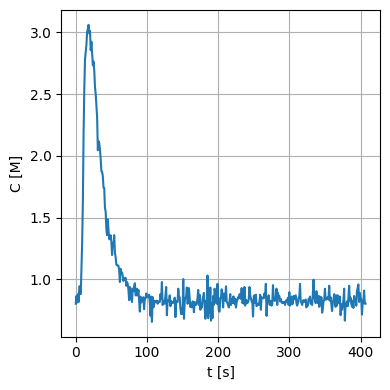

In [29]:
#! IGNORE EXPECTED OUTPUT
# importing plotting library
import matplotlib.pyplot as plt

# Extracting data from the data frame
t = df["Sample Time"].values
CSTR1 = df["AI0"].values

# Plotting the data
#! BEGIN EXCLUDE
plt.figure(figsize=(4,4))
#! END EXCLUDE
plt.plot(t, CSTR1, "-")
plt.xlabel("t [s]")
plt.ylabel("C [M]")
plt.grid()
#! BEGIN EXCLUDE
plt.tight_layout()
#! END EXCLUDE
plt.show()

## Exercise 5: Loading data with pandas and using it to curve fit

**In this exercise you will load data from the file `curve_fit.txt` and you have to try to curve fit it.**

a) Start by importing `pandas`, `numpy` and `matplotlib.pyplot`

In [42]:
#! BEGIN EXCLUDE
# GENERATING THE DATA 
import numpy as np
import matplotlib.pyplot as plt

# Ensuring reproducibility
np.random.seed(0)

def fit_func(x, a, b, c):
    return a + b*x + c*np.exp(-x**2)

a, b, c = 2, 1, 3
x = np.linspace(0, 2, 100)
y = fit_func(x, a, b, c) + (np.random.rand(len(x))-0.5)*0.25

# Saving the data 
def save_data(filename, labels, matrix):
    with open(filename, "w") as f:
        f.write("\t".join(labels))
        for row in matrix:
            f.write("\n"+"\t".join(["%.4f"%n for n in row]))

data = np.vstack((x,y)).T
save_data("curve_fit.txt", ["x","y"], data)
#! END EXCLUDE

In [43]:
#! BEGIN ANSWER
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#! END ANSWER

b) Now load the data from file `curve_fit.txt` using ` pandas.read_csv ` . If the file does not load properly, the delimiter might be different than a comma, in which canse you can add the keyword argument `delimiter="your delimiter"`. 

> Hint: This data file uses a tab <code>\\t</code> as delimiter. The delimiter tells the computer what separates the different cell values.

In [44]:
#! BEGIN ANSWER
data = pd.read_csv("curve_fit.txt", delimiter="\t")
#! END ANSWER

# Extracting data from the data frame
x = data["x"].values
y = data["y"].values
#! BEGIN EXCLUDE
print("`x.shape`=",x.shape)
print("`y.shape`=",y.shape)
#! END EXCLUDE

`x.shape`= (100,)
`y.shape`= (100,)


c) Plot the first column against the second to get a feel for the data

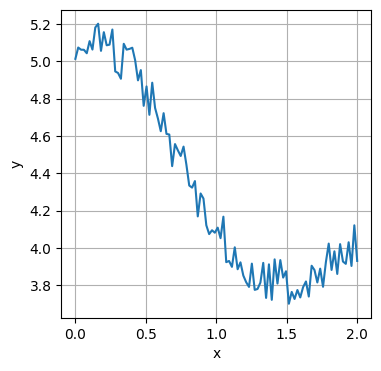

In [45]:
#! BEGIN ANSWER
#! BEGIN EXCLUDE
plt.figure(figsize=(4,4))
#! END EXCLUDE
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()
#! END ANSWER

d) Try to fit the data to the equation below using `scipy.optimize.curve_fit`.

$$y = a + bx + c\exp -x^2$$

In [46]:
#! BEGIN ANSWER
def fit_func(x, a, b, c):
  return a + b*x + c*np.exp(-x**2)

# Fitting
(a, b, c), _ = curve_fit(fit_func, x, y, p0=[1, 1, 1])
#! END ANSWER
#! BEGIN EXCLUDE
print("`afit` $\\approx$",a)
print("`bfit` $\\approx$",b)
print("`cfit` $\\approx$",c)
#! END EXCLUDE

`afit` $\approx$ 1.9157912822217567
`bfit` $\approx$ 1.030604774291593
`cfit` $\approx$ 3.10596228617174


e) Confirm that your fit is good by plotting the fitted curve and the original data in the same plot.

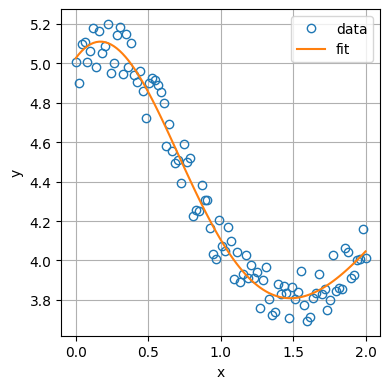

In [34]:
#! BEGIN ANSWER
# Generating data to plot fitted line
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = fit_func(x, a, b, c)

# Plotting fitted line and data
#! BEGIN EXCLUDE
plt.figure(figsize=(4,4))
#! END EXCLUDE
plt.plot(x, y, "o", mfc='none', label="data")
plt.plot(x_fit, y_fit, "-", label="fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
#! BEGIN EXCLUDE
plt.tight_layout()
#! END EXCLUDE
plt.show()
#! END ANSWER

>Make sure to clear your variables before moving on to the next question by running the following code block

In [35]:
%reset -f

## Exericise 6: Modelling a real system

Done live, but you can find an example below:

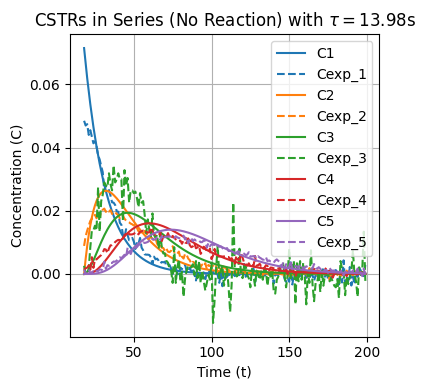

In [36]:
#! IGNORE EXPECTED OUTPUT
#! BEGIN ANSWER
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit

def process_experimental_data(data):
    # Splitting time from concentrations
    texp = data[:,0]
    Cexp = data[:,1:]

    # Finding time of injection
    iinj = np.argmax(Cexp[:,0])

    # Finding 1s in index
    dt = texp[1]-texp[0]
    diinj = int(200/dt)

    # Finding the average offset
    offset = np.mean(Cexp[-diinj:,:], 0).reshape(1, 5)

    # Correcting the data
    Cexp = Cexp[iinj:diinj, :]-offset
    texp = texp[iinj:diinj]

    # Normalizing experimental data
    Cexp /= np.trapz(Cexp, texp, axis=0).reshape(1, 5)

    return texp, Cexp


def solve_5CSTR(t, params):
    # Define the CSTR in series model
    def model(C, t, params):
          one_over_tau = params["one_over_tau"]
          Cin = params['Cin']

          dCdt = np.zeros(len(C))
          dCdt[0] = one_over_tau*(Cin-C[0])
          dCdt[1:] = one_over_tau*(C[0:-1] - C[1:])
          return dCdt

    # Solve the ODE using odeint
    C0 = params["C0"]
    C = odeint(model, C0, t, args=(params,))

    # Normalizing final result
    Nc = C/np.trapz(C, t, axis=0).reshape(1,5)
    return Nc


def main():
    """
    1. Reads the experimental data and corrects it for fitting
    2. Fits the data
    3. Compare experiment with fit with plots
    """
    # Loading experimental data
    data = np.loadtxt("live_exp_2022.txt", skiprows=1, usecols=(2, 3, 4, 5, 6, 7))
    texp, Cexp = process_experimental_data(data)

    # Parameters dictionary for organization
    params = {
      'one_over_tau': 1, # 1/Residence time of cstr [1/s]
      'Cin': 0.0,  # Inlet concentration
      "C0": [1, 0, 0, 0, 0], # Initial concentration in each CSTR (arbitrary values)
      "t": np.linspace(texp.min(), texp.max(), 100)
    }

    # Defining function that varies tau and returns concentration profile for fitting
    def objective_function(t, one_over_tau):
        params["one_over_tau"] = one_over_tau
        return solve_5CSTR(t, params).ravel()

    # Performing the curve_fit
    one_over_tau, _ = curve_fit(objective_function, texp, Cexp.ravel(), p0=[params["one_over_tau"]])

    # Evaluating model at target tau
    params["tau"] = tau = 1/one_over_tau
    C = solve_5CSTR(texp, params)

    # Plot the results for each CSTR
    #! BEGIN EXCLUDE
    plt.figure(figsize=(4,4))
    #! END EXCLUDE
    for i in range(5):
        artist, = plt.plot(texp, C[:, i], "-", label='C{}'.format(i + 1))
        color = artist._color
        plt.plot(texp, Cexp[:, i], '--', color=color, label='Cexp_{}'.format(i + 1))

    plt.xlabel('Time (t)')
    plt.ylabel('Concentration (C)')
    plt.title('CSTRs in Series (No Reaction) with tau={:.2f}$'.format(tau[0]))
    #! BEGIN EXCLUDE
    plt.title('CSTRs in Series (No Reaction) with $\\tau={:.2f}$s'.format(tau[0]))
    #! END EXCLUDE
    plt.legend()
    plt.grid()
    #! BEGIN EXCLUDE
    plt.tight_layout()
    #! END EXCLUDE
    plt.show()

main()
#! END ANSWER

>Make sure to clear your variables before moving on to the next question by running the following code block

In [37]:
%reset -f